# 3.23 Black-Scholes. Put-option. Dependence on guarantee

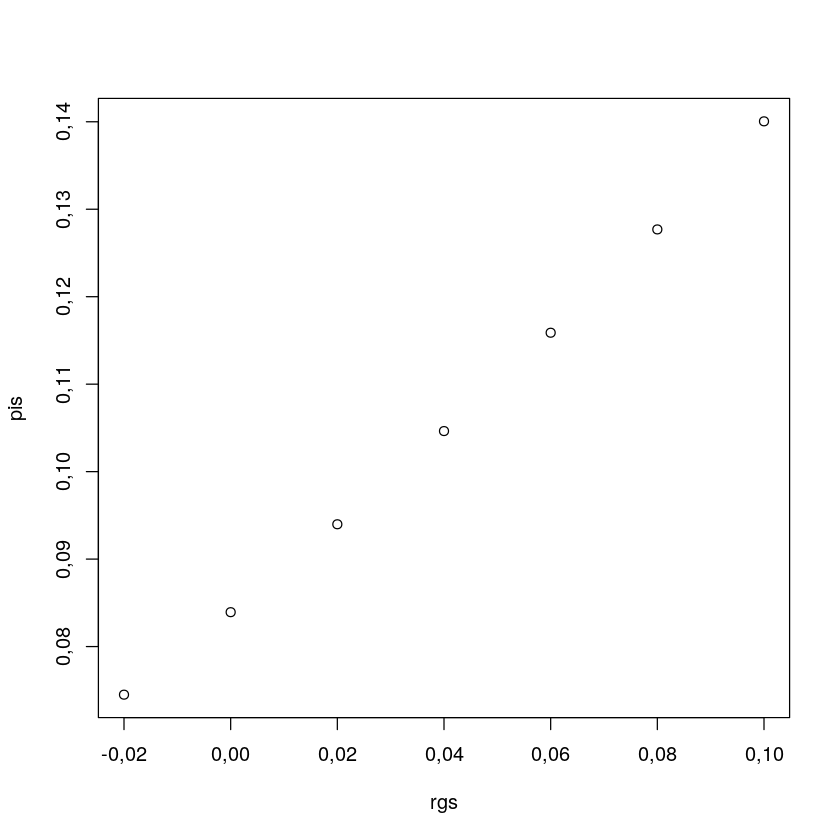

In [9]:
blacScholePutPremium = function(nu0, sigma, r, T, rg){
    sigT=sqrt(T)*sigma
    a = (log(1+rg) -r*T + sigT**2/2)/sigT
    pi = ((1+rg)*exp(-r*T)*pnorm(a) - pnorm(a-sigT))*nu0
    return(pi)
}

nu0 = 1
sigma = 0.25
r = 0.03
T = 1
rgs <- seq(from = -.02, to = .1, by = 0.02)
pis = numeric(length(rgs))
for (i in 1:length(rgs)){
    pis[i] = blacScholePutPremium(nu0, sigma, r, T, rgs[i])
}
plot(rgs, pis)

Higher guarantee, higher premium.


# 3.24 Put-options. Q-model. MC
The equations are given on p. 74 in Bølvikeb.

In [15]:
MCPutPremium = function(sigma, rg, r, nu0, T){
    eps = rnorm(m)
    R = exp(r*T-sigma**2*T/2 + sigma*sqrt(T)*eps) - 1;
    pi = exp(-r*T)*mean(pmax(rg-R, 0))*nu0    
    return(pi)
}
sigma = 0.25
rg = .04
r = .03
nu0 = 1
T = 1
ms = c(10000, 100000, 1000000)

piBlackScholes = blacScholePutPremium(nu0, sigma, r, T, rg)

for (m in ms){
    piMC = MCPutPremium(sigma, rg, r, nu0, T)
    print(c('MC/Black-Scholes', piMC/piBlackScholes))    
}

[1] "MC/Black-Scholes"  "0,989735416136256"
[1] "MC/Black-Scholes"  "0,997827546037573"
[1] "MC/Black-Scholes"  "0,999255529098642"


MC approaches the exact premium (Black-Scholes) well for all cycle limits.

# 3.30 Underwriter. Poisson/log-normal claims.

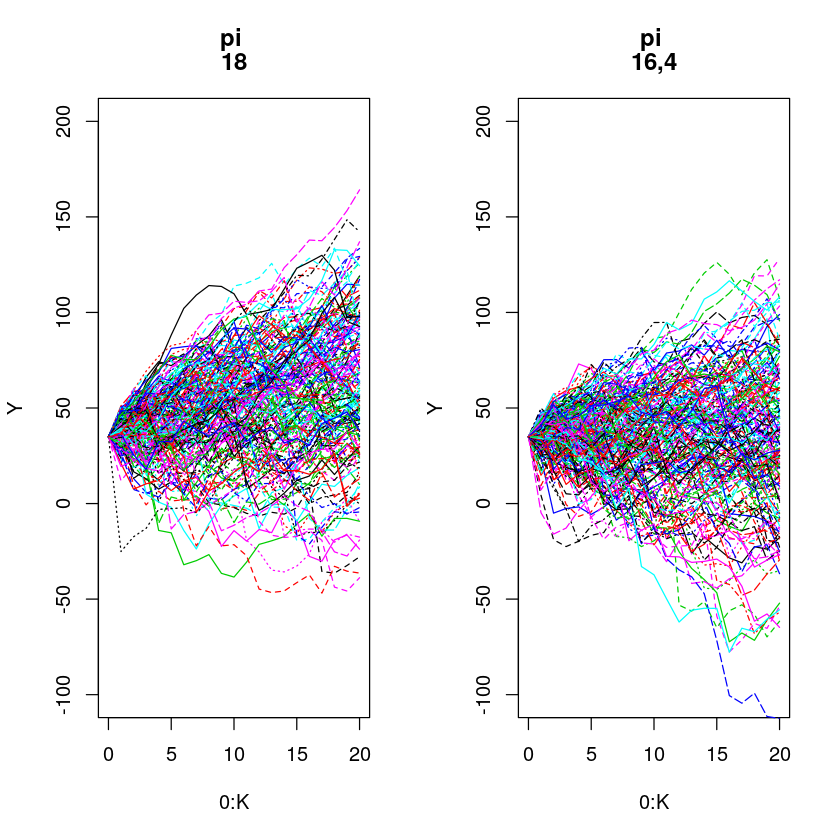

In [65]:
portFolioRisk = function(mk, lambda, xsi, sigma){
    X = 1:mk*0
    N = rpois(mk, lambda)
    for (i in 1:mk){
        Z = rlnorm(N[i], xsi, sigma) 
        X[i] = sum(Z)
    }
    return(X)
}

underwriter = function(lambda, xsi, sigma, pi, nu0, K, m){
    mk = m*K
    X = portFolioRisk(mk, lambda, xsi, sigma)
    X = matrix(X, K, m)
    Y = nu0 - apply(X - pi, 2, cumsum) # K x m matrix. Each perid in K has a MC value in m.
    # apply: (X-pi) is function or matrix. 2 is which dimension. cumsum is what to do. 
    # apply: https://www.datacamp.com/community/tutorials/r-tutorial-apply-family
    Y = rbind(rep(nu0, m), Y) # Still K x m. rep(nu0,m): m-vector with nu0 every element. 
    #Y now starts with nu0 each MC I think.
    # Rbind: To join two data frames (datasets) vertically, use the rbind function.
    return(Y)    
}

lambda = 10
xsi = 0
sigma = 1
pis = c(18, 16.4)
nu0 = 35
K = 20
m = 200

counter = 1
par(mfrow = c(1, length(pis)))
for (pi in pis){
    Y = underwriter(lambda, xsi, sigma, pis[counter], nu0, K, m)
    matplot(0:K, Y, "l", ylim=c(-100, 200))
    title(c('pi ', pi))
    counter = counter + 1
}

Slight drif upwards dissapeared to the right. Reason: To the right, th epure premium is used, so we do not expect ent profits (giving increasing Y's).